# Reading the train data

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import warnings
warnings.simplefilter(action='ignore')

In [64]:
data_train = pd.read_csv("C:/Users/Bhanu prakash/Downloads/Machine_Learning1/train_data-1599717478076.csv")

# EDA( Explooratory Data Analysis)

In [65]:
## Head of the data
data_train.head(3)

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0


In [66]:
## Tail of the data
data_train.tail(3)

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,2016-12-26 21:47:08+00:00,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2016-12-11 13:44:06+00:00,2,0
76528,1051344513778987,6754801,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-11 19:08:18+00:00,2,0


In [67]:
## Dimensions of the train data
data_train.shape

(76529, 11)

In [68]:
 #There are 11 columns and 76529 rows 
# Out 11 columns one column is target variable that is is_fraud

In [69]:
## Data type of each attribute
data_train.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [70]:
## Summary of the train data
data_train.describe()

,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529.000000,76529.000000,76529.000000,76529.000000
mean,6.940200e+14,1.247483e+07,58497.189105,132.724348,2.255707,0.002012
std,7.867885e+14,1.205878e+07,36740.216787,2350.110900,0.732174,0.044814
min,8.000000e+00,1.000000e+00,7889.000000,-20000.000000,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,23667.000000,-1.000000,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,47334.000000,20.000000,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,78890.000000,52.000000,2.000000,0.000000
max,2.784238e+15,5.592048e+07,213003.000000,197217.760000,4.000000,1.000000


In [71]:
# From the above summary looks fine except the money_transacted max values

In [72]:
## Finding the NA values in the train data
print(data_train.isna().sum())

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64


In [73]:
# There are no NA values in the data

In [74]:
## Unique values of the each column
data_train.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

In [75]:
# Country is having only one value so we can remove the column

In [76]:
## Removing the country column from the train data
data_train.drop('country',axis = 1, inplace = True)

In [77]:
data_train.shape

(76529, 10)

In [78]:
## Finding the unique names of the column payment_method
data_train.payment_method.unique()

array(['sbi_atm_cum_debit_card', 'e_wallet_payments', 'other_debit_cards',
       'visa_master_debit_cards', 'visa_master_credit_cards',
       'unified_payments_interface'], dtype=object)

In [79]:
data_train.partner_pricing_category.unique()

array([2, 4, 1, 0], dtype=int64)

In [80]:
data_train.device_type.unique()

array(['android_devices', 'other_pcs', 'windows_pcs', 'ios_devices'],
      dtype=object)

In [81]:
data_train.is_fraud.unique()

array([0, 1], dtype=int64)

# Visualization

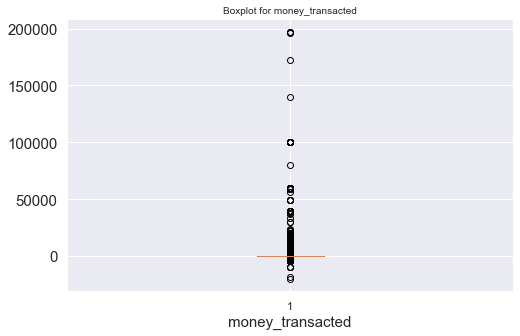

In [82]:
# Box plot for money_transacted

plt.figure(figsize=(8,5))
out=plt.boxplot(data_train['money_transacted'])
plt.title('Boxplot for money_transacted',fontsize=10)
plt.xlabel('money_transacted',fontsize=15)
plt.yticks(fontsize=15)
plt.show(True)

In [83]:
## There are so many outlier values 
## As we know that if the money is debited it will be positive and if money is credited it is Negative
## There are more outliers in the debited category 
## Because most of the fraud will happen in debited category rather than credited category

<AxesSubplot:xlabel='device_type', ylabel='count'>

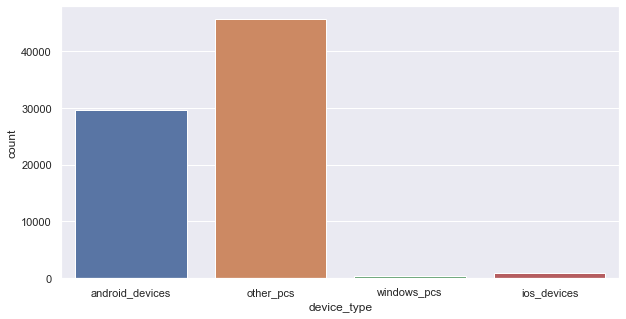

In [84]:
## Plot for the device_type 

sns.countplot(x=data_train.device_type)

In [85]:
# There are over 30k transaction from the android_device
# Other_pcs are having more transactions 
# windows pc and ios devices are having lesser transactions

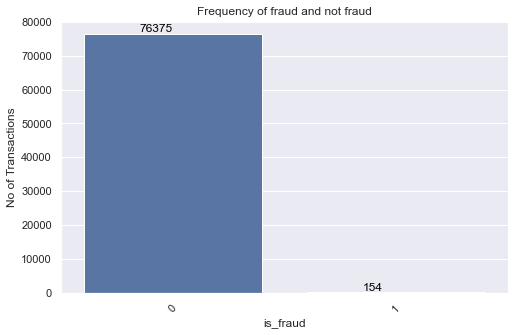

In [86]:
## Plot for the is_fraud 
plt.figure(figsize = (8,5))
plt.title('Frequency of fraud and not fraud')
ax=sns.countplot(x = 'is_fraud', data = data_train)
plt.xlabel('is_fraud')
plt.ylabel('No of Transactions')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [87]:
# There are 154 fraud transactions out of total transactions

<AxesSubplot:>

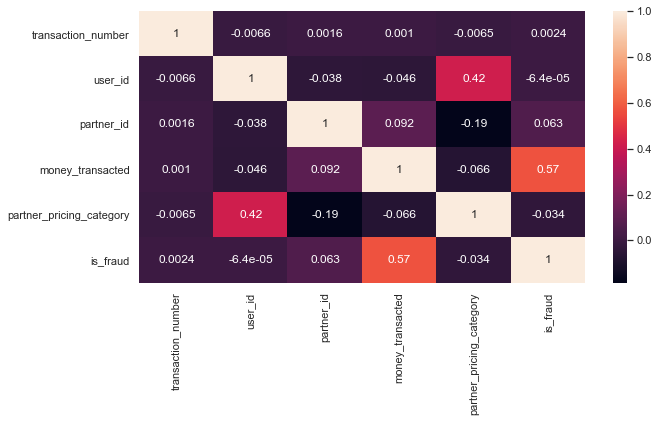

In [88]:
import seaborn as sbn

## Correlation plot for the data
sbn.heatmap(data_train.corr(),annot=True)

In [89]:
## money_transacted and is_fraud are having the highest corelation 

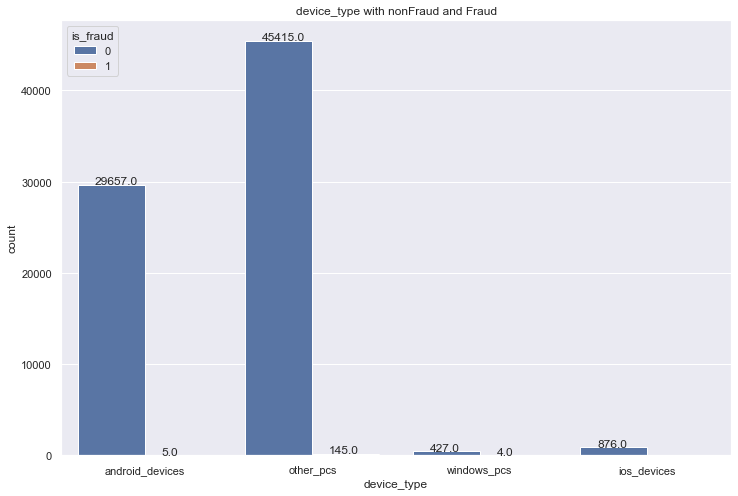

In [90]:
## Count of fraud and not fraud transactions in different device types

plt.figure(figsize=(12,8))
ax=sns.countplot(x = "device_type", hue="is_fraud", data = data_train)
plt.title('device_type with nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [91]:
# Android device has 5 fraud detections 
# ios device has no frauds 
# other pcs has more fraud detections

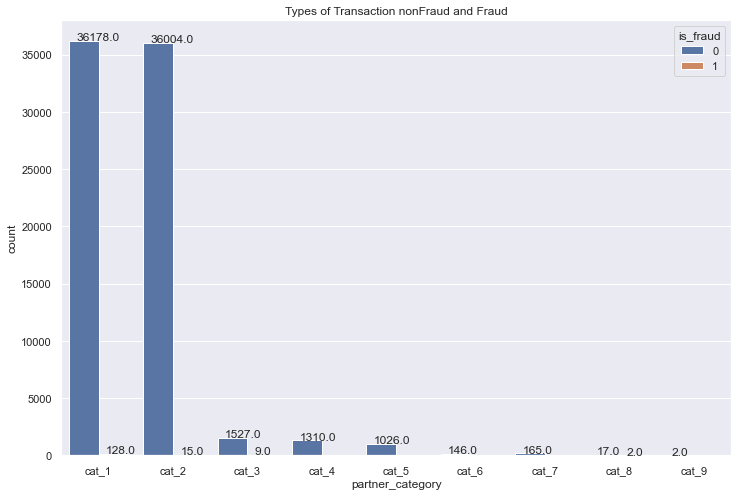

In [92]:
## Plot for the partner_category and fraud transcations
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "partner_category", hue="is_fraud", data = data_train)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [93]:
## From the above graph cat_1 has more fraud detections 
# cat_4 t0 cat_9 has no fraud detections

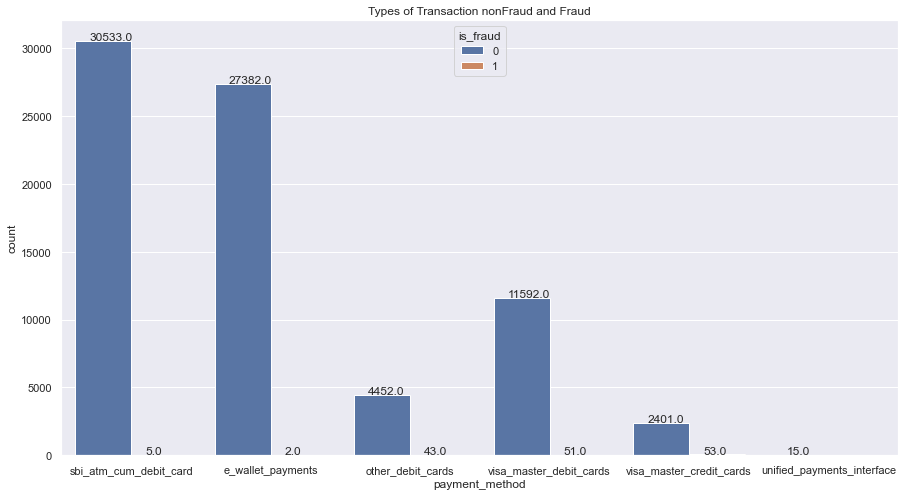

In [94]:
## Plot for the payment_method and fraud detection
plt.figure(figsize=(15,8))
ax=sns.countplot(x = "payment_method", hue="is_fraud", data = data_train)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [95]:
# From the above graph we can see that other_ debit_cards , visa master debit and credit cards are having more fraud transactio

<AxesSubplot:xlabel='is_fraud', ylabel='money_transacted'>

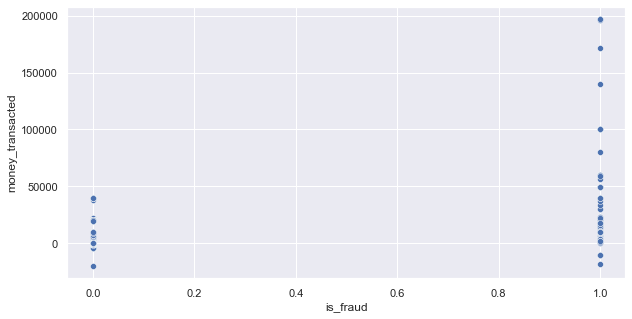

In [96]:
# Plot for the money_transacted and is_fraud
sns.scatterplot(x="is_fraud", y="money_transacted", data=data_train)

In [97]:
## if the transaction amount is less than 50000 then the chance of not being fraud is a little more

## But in the same way the fraud transactions are more in the transactions of below 50000
## Above 50000 also there are more fraud transactions

# Creating new columns

In [98]:
data_train.head(3)

,transaction_number,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0


In [99]:
## Converting transaction_initiation into into y/m/d format
data_train['transaction_initiation'] = pd.to_datetime(data_train['transaction_initiation'], 
                                         infer_datetime_format=True)

In [100]:
data_train['transaction_initiation'] = pd.to_datetime(data_train['transaction_initiation'], format='%Y-%m-%d %H:%M:%S.')

In [101]:
## Creating new variables 

data_train['Day of initiation'] = data_train['transaction_initiation'].dt.day
data_train['Month of initiation'] = data_train['transaction_initiation'].dt.month
data_train['Year of initiation'] = data_train['transaction_initiation'].dt.year
data_train['Hour of the initiation'] = data_train['transaction_initiation'].dt.hour

In [102]:
data_train.head(3)

,transaction_number,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,Day of initiation,Month of initiation,Year of initiation,Hour of the initiation
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,15,11,2016,19
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,11,1,2017,9
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,7,12,2016,7


<AxesSubplot:xlabel='Hour of the initiation', ylabel='is_fraud'>

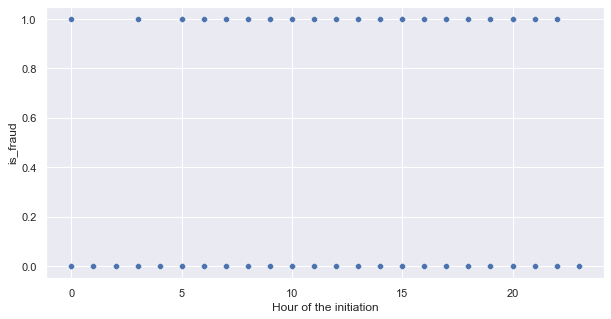

In [103]:
## Plotting the Hour of initiation and is_fraud
sns.scatterplot(x="Hour of the initiation", y="is_fraud", data=data_train)

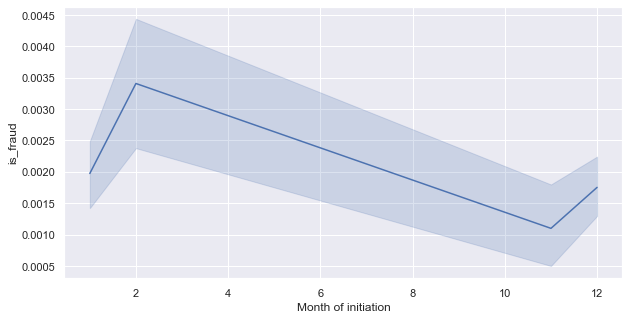

In [104]:
## Lineplot for the month of initiation and is_fraud
sns.lineplot(x="Month of initiation", y="is_fraud", data=data_train)
sns.set(rc={'figure.figsize':(10, 5)})

In [105]:
## from this graph we cannot find any relation or any type sequence to finf the fraud detection 

Drooping the orginal column

In [106]:
data_train.drop('transaction_initiation' , axis = 1, inplace = True)

Dropping some other columns which are not useful

In [107]:
data_train.drop('user_id',axis = 1, inplace = True)

### Creating dummies for the categorical variables

In [108]:
data_dummy = pd.get_dummies(data_train[['payment_method','partner_category','device_type']],drop_first=True)

In [109]:
data_train = pd.concat([data_train,data_dummy],axis=1)

In [110]:
data_train.shape

(76529, 28)

In [111]:
data_train.head(3)

,transaction_number,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,Day of initiation,Month of initiation,...,partner_category_cat_3,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,partner_category_cat_9,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs
0,144703125000,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2,0,15,11,...,0,0,0,0,0,0,0,0,0,0
1,77406814453032,e_wallet_payments,78890,cat_2,other_pcs,100.0,2,0,11,1,...,0,0,0,0,0,0,0,0,1,0
2,308929485482801,e_wallet_payments,78890,cat_2,other_pcs,50.0,2,0,7,12,...,0,0,0,0,0,0,0,0,1,0


In [112]:
# After dummifying we have 27 columns 
# Out of 27 columns we are now going to remove columns which are not useful
# We are removing this columns based on our visualisations

### Dropping the orrginal columns

In [113]:
data_train.drop(['payment_method','partner_id','partner_category','device_type'],axis = 1 , inplace = True)

In [114]:
data_train.drop('partner_category_cat_9', axis = 1, inplace = True)

In [115]:
data_train.head(3)

,transaction_number,money_transacted,partner_pricing_category,is_fraud,Day of initiation,Month of initiation,Year of initiation,Hour of the initiation,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,...,partner_category_cat_2,partner_category_cat_3,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs
0,144703125000,-5.0,2,0,15,11,2016,19,0,1,...,0,0,0,0,0,0,0,0,0,0
1,77406814453032,100.0,2,0,11,1,2017,9,0,0,...,1,0,0,0,0,0,0,0,1,0
2,308929485482801,50.0,2,0,7,12,2016,7,0,0,...,1,0,0,0,0,0,0,0,1,0


In [116]:
data_train.shape

(76529, 23)

# Reading the test data

In [117]:
data_test = pd.read_csv("C:/Users/Bhanu prakash/Downloads/Machine_Learning1/test_data-1599717650029.csv")

In [118]:
# Head of test data
data_test.head(3)

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2


In [119]:
# Dimensions of the test data
data_test.shape

(19133, 10)

In [120]:
## There are 10 columns and 19133 rows

# Creating new columns as we made in the train data

In [121]:
## Converting transaction_initiation into into y/m/d format
data_test['transaction_initiation'] = pd.to_datetime(data_test['transaction_initiation'], 
                                         infer_datetime_format=True)

In [122]:
data_test['transaction_initiation'] = pd.to_datetime(data_test['transaction_initiation'], format='%Y-%m-%d %H:%M:%S.')

In [123]:
## Creating new variables 

data_test['Day of initiation'] = data_test['transaction_initiation'].dt.day
data_test['Month of initiation'] = data_test['transaction_initiation'].dt.month
data_test['Year of initiation'] = data_test['transaction_initiation'].dt.year
data_test['Hour of the initiation'] = data_test['transaction_initiation'].dt.hour

In [124]:
## Droping the column transaction_initiation
data_test.drop('transaction_initiation',axis = 1, inplace = True)

### Dropping the unused columns

In [125]:
data_test.drop('user_id',axis = 1, inplace = True)

In [126]:
data_test.drop('country', axis = 1, inplace = True)

### Creating dummy variables for categorical variables in the test data

In [127]:
data_test_dummy = pd.get_dummies(data_test[['payment_method','partner_category','device_type']],drop_first=True)

In [128]:
data_test = pd.concat([data_test,data_test_dummy],axis=1)

In [129]:
data_test.shape

(19133, 26)

### Dropping the column from the test data

In [130]:
data_test.drop(['payment_method','partner_id','partner_category','device_type'],axis = 1 , inplace = True)

In [131]:
data_test.drop('transaction_number',axis = 1, inplace = True)

In [132]:
data_train.drop('transaction_number',axis = 1, inplace = True)

In [133]:
data_test.shape

(19133, 21)

In [134]:
data_test.head(3)

,money_transacted,partner_pricing_category,Day of initiation,Month of initiation,Year of initiation,Hour of the initiation,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,...,partner_category_cat_2,partner_category_cat_3,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs
0,200.0,2,28,12,2016,14,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,20.0,2,14,12,2016,17,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,-100.0,2,21,1,2017,10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Seperating dependent and independent variables

In [135]:
y_train = data_train['is_fraud']
X_train = data_train.drop(['is_fraud'], axis = 1)

In [136]:
X_test = data_test

In [137]:
y_test = pd.read_csv("C:/Users/Bhanu prakash/Downloads/Machine_Learning1/solution-by-157-1599727408502-by-212-1632572167611.csv")

# DATA MODELLING

### Import Logidtic Regression

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [139]:
LR = LogisticRegression().fit(X_train,y_train)

In [140]:
prediction = LR.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test.is_fraud,prediction)
print(accuracy)

0.9982752312758062


In [142]:
# Accuracy is 0.9982

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test.is_fraud,LR.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.65      0.33      0.44        39

    accuracy                           1.00     19133
   macro avg       0.82      0.67      0.72     19133
weighted avg       1.00      1.00      1.00     19133



In [144]:
from sklearn.metrics import f1_score

In [145]:
f1_score(y_test.is_fraud,prediction )

0.4406779661016949

In [146]:
# Accuracy is 0.440

### Import GuassianNB ( Naive Bayes )

In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
model = GaussianNB()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [149]:
accuracy = accuracy_score(y_test.is_fraud,predictions)
print(accuracy)

0.9524381957873831


In [150]:
## Accuracy is 0.9593

# which is less than logistic regression models accuracy

In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test.is_fraud,model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     19094
           1       0.04      0.97      0.08        39

    accuracy                           0.95     19133
   macro avg       0.52      0.96      0.53     19133
weighted avg       1.00      0.95      0.97     19133



In [152]:
# F1 score is 0.08
# ie is very less

### Import Decession Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
DecesionTree = DecisionTreeClassifier()
DecesionTree.fit(X_train,y_train)
DecesionTree_Predict = DecesionTree.predict(X_test)

In [155]:
print('The accuracy of the Decesion Tree Model is',metrics.accuracy_score(DecesionTree_Predict,y_test.is_fraud))

The accuracy of the Decesion Tree Model is 0.9994250770919354


In [156]:
## Accuracy of the model is higher than remianing both models

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test.is_fraud,DecesionTree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.91      0.79      0.85        39

    accuracy                           1.00     19133
   macro avg       0.96      0.90      0.92     19133
weighted avg       1.00      1.00      1.00     19133



In [158]:
## f1-score is 0.85 which is higher than the reamining models

# Import KNN 

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
KNN = KNeighborsClassifier()

In [161]:
KNN.fit(X_train,y_train)
KNN_Predict = KNN.predict(X_test)
print('The accuracy of the KNN Model is',metrics.accuracy_score(KNN_Predict,y_test.is_fraud))

The accuracy of the KNN Model is 0.9994250770919354


In [162]:
# The accuracy is 0.9993 which is higher than all the models

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test.is_fraud,KNN.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.91      0.79      0.85        39

    accuracy                           1.00     19133
   macro avg       0.96      0.90      0.92     19133
weighted avg       1.00      1.00      1.00     19133



In [231]:
## f1- score is 0.85 
# which is equal to decession tree 

# Recomendatation of IndAvenue

 The recomendation i will give to the company is to concentrate more on high amount transactations accounts

And i also advice them to concentrate more visa master debit and credit card transactations

Concentrate more on the partner_category 1 and 2 

# Model explainatation in non techinical terms

A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test,
and each leaf node (terminal node) holds a class label. 

This algorithm compares the values of the root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

# simple startegy to ensure fast consumercheckout

Assure the customer 


If the fraud has happened try to find out as fast as you can and help the consumer

Understand the customers from previous data and try to customise your content

Try to develop your customisatation with the upcoming and present running technology